## Analyzing data from MovieLens

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [7]:
from IPython.lib.display import YouTubeVideo

In [10]:
YouTubeVideo('6O43gOxtaWo', start=14)

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!

**assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
*----------------------

## Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.



In [1]:
import pandas as pd
from IPython.display import display, HTML
pd.set_option('display.mpl_style', 'default')

def get_occupation(ocp=0):
    """
        The function creates and returns a list of occupations
    """
    ocp_list = ["other or not specified", "academic/educator", "artist", 
                  "clerical-admin", "college/grad student",
                  "customer service","doctor/health care", "executive/managerial", 
                  "farmer", "homemaker", "K-12 student", 
                  "lawyer", "programmer", "retired", "sales/marketing", 
                  "scientist", "self-employed", "technician/engineer", 
                  "tradesman/craftsman", "unemployed", "writer"]
    return ocp_list[int(ocp)]
    
def get_age(age='1'):
    """
        The function returns a dictionary of age
    """
    age_dict={'1':  "Under 18",
              '18':  "18-24",
              '25':  "25-34",
              '35':  "35-44",
              '45':  "45-49",
              '50':  "50-55",
              '56':  "56+"}
    return age_dict[str(age)]


def get_user_dataset():
    """
        Read user.dat and convert in into a dataframe
        The row format is as follows: UserID::Gender::Age::Occupation::ZipCode  
    """
    UserID,Gender,Age,Ocptn,zipcd = [],[],[],[],[]
    User_DataSet = pd.DataFrame()

    with open('users.dat') as f:
        for line in f:
            line = str(line.strip()).split("::")
            UserID.append(line[0])
            Gender.append(line[1])
            Age.append(get_age(age=line[2]))
            Ocptn.append(get_occupation(ocp=line[3]))
            zipcd.append(line[4])
    User_DataSet["userID"] = UserID
    User_DataSet["gender"] = Gender
    User_DataSet["age"] = Age
    User_DataSet["ocptn"] = Ocptn
    User_DataSet["zipCD"] = zipcd
    return User_DataSet

def get_rating_dataset():
    """
        Read ratings.dat and convert in into a dataframe
        The row format is as follows: UserID::MovieID::Rating::Timestamp  
    """
    R_UserID,R_MovieID,rating,TimeStamp = [],[],[],[]
    Rating_DataSet = pd.DataFrame()
    
    with open('ratings.dat') as f:
        for line in f:
            line = str(line.strip()).split("::")
            R_UserID.append(line[0])
            R_MovieID.append(line[1])
            rating.append(line[2])
            TimeStamp.append(line[3])
    Rating_DataSet["userID"] = R_UserID
    Rating_DataSet["movieID"] = R_MovieID
    Rating_DataSet["rating"] = list(map(int, rating))
    Rating_DataSet["timestamp"] = TimeStamp
    return Rating_DataSet

def get_movie_dataset():
    """
        Read movies.dat and convert in into a dataframe
        The row format is as follows: MovieID::Title::Genres  
    """
    MovieID,Title,Genere = [],[],[]
    Movie_DataSet = pd.DataFrame()
    
    with open('movies.dat') as f:
        for line in f:
            line = str(line.strip()).split("::")
            MovieID.append(line[0])
            Title.append(line[1])
            Genere.append(line[2])
    Movie_DataSet["movieID"] = MovieID
    Movie_DataSet["genere"] = Genere
    Movie_DataSet["title"] = Title
    return Movie_DataSet

def store_hdf5(UR_M_result):
    Merged_hdf_datastore = pd.HDFStore('Merged_hdf_datastore.h5')
    print Merged_hdf_datastore
    Merged_hdf_datastore['UMR_dataframe'] = UR_M_result
    Merged_hdf_datastore

# ---------------------------------------
# Get user, movie, and ratings data frame
# and then merge them one at a time to 
# create a logical model
# ----------------------------------------
User_DataSet = get_user_dataset()
Movie_DataSet = get_movie_dataset()
Rating_DataSet = get_rating_dataset()

#Merge User and rating table with left outer join
UR_result = pd.merge(User_DataSet, Rating_DataSet, how='inner', on='userID', 
                     left_index=False, right_index=False, sort=True,
                     suffixes=('_x', '_y'), copy=True, indicator=False)

#Merge User+rating table with Movie table - left outer join
UR_M_result = pd.merge(UR_result, Movie_DataSet, how='inner', on='movieID',
                       left_index=False, right_index=False, sort=True,
                       suffixes=('_x', '_y'), copy=True, indicator=False)

# store it in hdf5
print "MERGED DATASET"
display(UR_M_result)
store_hdf5(UR_M_result) 

MERGED DATASET


,userID,gender,age,ocptn,zipCD,movieID,rating,timestamp,genere,title
0,1,F,Under 18,K-12 student,48067,1,5,978824268,Animation|Children's|Comedy,Toy Story (1995)
1,10,F,35-44,academic/educator,95370,1,5,978226474,Animation|Children's|Comedy,Toy Story (1995)
2,1000,F,25-34,doctor/health care,90027,1,5,975041651,Animation|Children's|Comedy,Toy Story (1995)
3,1001,M,25-34,college/grad student,90210,1,4,976296608,Animation|Children's|Comedy,Toy Story (1995)
4,1004,M,25-34,clerical-admin,95136,1,5,975045804,Animation|Children's|Comedy,Toy Story (1995)
5,1008,M,35-44,clerical-admin,77064,1,4,975030379,Animation|Children's|Comedy,Toy Story (1995)
6,1010,M,25-34,other or not specified,10310,1,2,975220910,Animation|Children's|Comedy,Toy Story (1995)
7,1014,F,45-49,technician/engineer,03054,1,3,975015612,Animation|Children's|Comedy,Toy Story (1995)
8,1015,M,35-44,clerical-admin,11220,1,5,975017987,Animation|Children's|Comedy,Toy Story (1995)
9,1017,M,35-44,other or not specified,30906,1,4,975009586,Animation|Children's|Comedy,Toy Story (1995)


ImportError: HDFStore requires PyTables, "No module named tables" problem importing

## some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?

In [2]:
def get_movie_mean_over_45(df, filtr = "all"):
    
    if filtr == 'all':
        #Movies rated over 4.5
        grouped = df.groupby(['movieID'],as_index=False).rating.mean()
        #dfg = grouped.sort_values('rating',ascending=False,inplace=False)
        rated_45 = grouped.query('rating >= 4.5')
        print "Number of movies with mean rating > 4.5 : %s" % (str(len(rated_45)))        
    elif filtr == 'M' or 'F':
        #movies over 4.5 among men
        men_rated_movies = df.query('gender == @filtr')
        Men_grouped = men_rated_movies.groupby(['movieID'],as_index=False).rating.mean()
        filtr_rated_45 = Men_grouped.query('rating >= 4.5')

        if filtr == 'M':
            print "Number of movies with mean rating > 4.5 among men : %s" % str(len(filtr_rated_45))
        elif filtr == 'F':
            print "Number of movies with mean rating > 4.5 among women : %s" % str(len(filtr_rated_45))

In [3]:
get_movie_mean_over_45(UR_M_result,filtr="all")
get_movie_mean_over_45(UR_M_result,filtr="M")
get_movie_mean_over_45(UR_M_result,filtr="F")

Number of movies with mean rating > 4.5 : 29
Number of movies with mean rating > 4.5 among men : 29
Number of movies with mean rating > 4.5 among women : 70


*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?

In [4]:
def get_movie_median_over_45(df,filtr = "all"):    
    if filtr == 'all':
        #Movies rated over 4.5
        grouped = df.groupby(['movieID'],as_index=False).rating.median()
        dfg = grouped.sort_values('rating',ascending=False,inplace=False)
        rated_45 = dfg.query('rating >= 4.5')
        print "Number of movies with median rating > 4.5 : "+str(len(rated_45))
        
    elif filtr == 'M' or 'F':
        #movies over 4.5 among men
        men_rated_movies_30y = df.query('gender == @filtr')
        men_rated_movies = men_rated_movies_30y[men_rated_movies_30y['age'].isin(["35-44","45-49","50-55","56+"])]
        
        Men_grouped = men_rated_movies.groupby(['movieID'],as_index=False).rating.median()
        filtr_rated_45 = Men_grouped.query('rating >= 4.5')
        
        if filtr == 'M':
            print "Number of movies with median rating > 4.5 among men 30+ yrs: "+str(len(filtr_rated_45))
        elif filtr == 'F':
            print "Number of movies with median rating > 4.5 among women 30+ yrs: "+str(len(filtr_rated_45))

In [5]:
get_movie_median_over_45(UR_M_result,filtr = "all")
get_movie_median_over_45(UR_M_result,filtr = "M")
get_movie_median_over_45(UR_M_result,filtr = "F")

Number of movies with median rating > 4.5 : 92
Number of movies with median rating > 4.5 among men 30+ yrs: 105
Number of movies with median rating > 4.5 among women 30+ yrs: 187


*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.

In [6]:
pd.value_counts(UR_M_result['title'].values)[0:10]

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64

*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to 
       please since they are all young children.  This conjecture may or may not be true, but how would 
       you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!

In [7]:
median_ratings_by_age = UR_M_result.groupby(['age'], as_index=False).rating.median()
median_ratings_by_age

,age,rating
0,18-24,4
1,25-34,4
2,35-44,4
3,45-49,4
4,50-55,4
5,56+,4
6,Under 18,4


In [8]:
# --------------------------------------------------------------------
# 4 is the median calculated above
# notice all of them are same
# We refrain from using mean because it is sensitive to extreme values
#
# To consider all the moments together, we can calculate the omega.
# --------------------------------------------------------------------
UR_M_result['omega_nr'] = UR_M_result[UR_M_result['rating'] > 4].rating - 4
UR_M_result['omega_dr'] = 4 - UR_M_result[UR_M_result['rating'] < 4].rating

omega_dr_by_age = UR_M_result.groupby(['age'], as_index=False).omega_dr.mean()
omega_nr_by_age = UR_M_result.groupby(['age'], as_index=False).omega_nr.mean()

omega_df = pd.DataFrame()
omega_df['age'] = omega_nr_by_age['age']
omega_df['omega_nr'] = omega_nr_by_age['omega_nr']
omega_df['omega_dr'] = omega_dr_by_age['omega_dr']
omega_df['omega'] = omega_df.omega_nr / omega_df.omega_dr
display(omega_df)

,age,omega_nr,omega_dr,omega
0,18-24,1,1.582557,0.631889
1,25-34,1,1.535329,0.651326
2,35-44,1,1.466371,0.681956
3,45-49,1,1.446614,0.691269
4,50-55,1,1.433810,0.697442
5,56+,1,1.444987,0.692048
6,Under 18,1,1.642962,0.608657


# Investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* A histogram of the ratings of all movies.
* A histogram of the *number* of ratings each movie recieved.
* A histogram of the *average rating* for each movie.
* A histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [2]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

*------------------------

## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

In [66]:
#----------------------------------------------------------
# This section contains code for reading and storing the 
# data set in HDF Store.  Subsequent sections contain code 
# for the plots.
#----------------------------------------------------------
import numpy as np
import matplotlib.pylab as py
import pandas as pd
import scipy.stats as st
np.set_printoptions(precision=2)
%matplotlib inline

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None,
                      names=unames, engine='python')


rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None,
                        names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None,
                        names=mnames, engine='python')

data = pd.merge(pd.merge(ratings, users) , movies)

data.loc[data['age'] < 18 , 'age_interval'] = "Under 18"
data.loc[(data['age'] >= 18) & (data['age'] < 25), 'age_interval'] = "18-24"
data.loc[(data['age'] >= 25) & (data['age'] < 35), 'age_interval'] = "25-34"
data.loc[(data['age'] >= 35)  & (data['age'] < 45), 'age_interval'] = "35-44"
data.loc[(data['age'] >= 45) & (data['age'] < 50), 'age_interval'] = "45-49"
data.loc[(data['age'] >= 50) & (data['age'] < 56), 'age_interval'] = "50-55"
data.loc[data['age'] >= 56, 'age_interval'] = "56+"

Merged_hdf_datastore = pd.HDFStore('Merged_hdf_datastore_data.h5')
print Merged_hdf_datastore
Merged_hdf_datastore['data'] = data

<class 'pandas.io.pytables.HDFStore'>
File path: Merged_hdf_datastore_data.h5
/data            frame        (shape->[1000209,11])


* Make a scatter plot of men versus women and their mean rating for every movie.

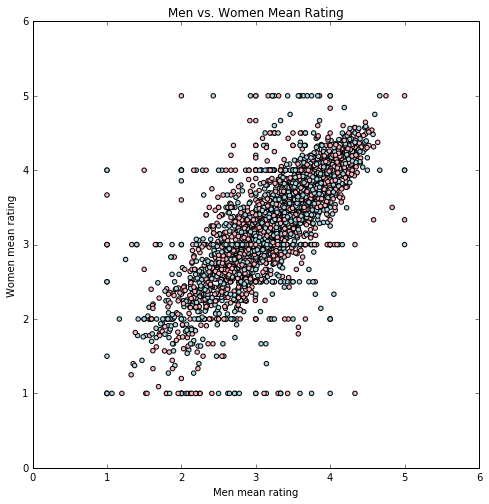

In [69]:
import matplotlib.pyplot as plt

X = data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
plt.figure(figsize=(8, 8))
plt.scatter(X['M'],X['F'], c=['lightblue', 'lightpink'])
plt.xlabel('Men mean rating')
plt.ylabel('Women mean rating')
plt.title("Men vs. Women Mean Rating")

* Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.

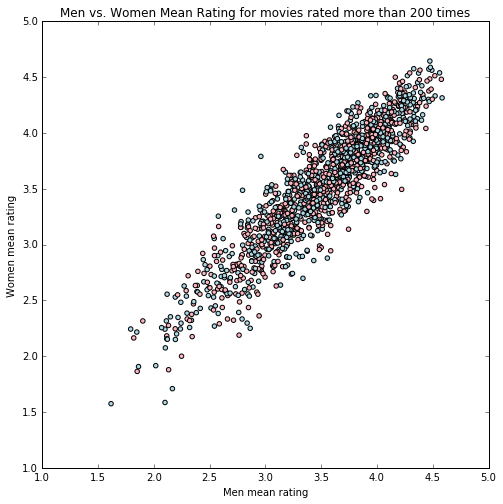

In [70]:
ratings_by_title = data.groupby('title').size()
active_titles = ratings_by_title.index[ratings_by_title > 200]
mean_ratings_grt200 = X.ix[active_titles]

plt.figure(figsize=(8, 8))
plt.scatter(mean_ratings_grt200['M'], mean_ratings_grt200['F'], c=['lightblue', 'lightpink'])
plt.xlabel('Men mean rating')
plt.ylabel('Women mean rating')
plt.title("Men vs. Women Mean Rating for movies rated more than 200 times")

* Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!

In [29]:
X.corr()

gender,F,M
gender,,
F,1.00000,0.76319
M,0.76319,1.00000


In [37]:
data[1:10]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_interval
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,56+
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,50-55
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama,18-24
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama,45-49


In [61]:
X=data.pivot_table('rating',index='age_interval',columns='gender',aggfunc='mean')

X['abs diff%'] = abs((X['M'] - X['F'])/((X['M'] + X['F'])/2)*100)
sorted_by_diff = X.sort_values(by='abs diff%', ascending=[False])
sorted_by_diff[:10]

gender,F,M,abs diff%
age_interval,,,
56+,3.915534,3.720327,5.112902
50-55,3.797110,3.687098,2.939849
Under 18,3.616291,3.517461,2.770775
25-34,3.606700,3.526780,2.240699
18-24,3.453145,3.525476,2.072950
35-44,3.659653,3.604434,1.520325
45-49,3.663044,3.627942,0.962894


In [62]:
Y=data.pivot_table('rating',index='age_interval',columns='gender',aggfunc='count')
Y

gender,F,M
age_interval,,
18-24,45427,138109
25-34,91340,304216
35-44,49473,149530
45-49,24110,59523
50-55,18064,54426
56+,9199,29581
Under 18,8827,18384


* Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [ ]:
import re
previousName = '0'
tmp = 0
for index, row in data.iterrows():
    if previousName == row['title']:
        continue
    titleName = row['title']
    year = re.search(r"\(([0-9]+)\)", titleName).group(1)
    previousName = titleName
    try:
        if int(year) in range(1900, 1910):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1900 - 1910"
        if int(year) in range(1911, 1920):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1911 - 1920"
        if int(year) in range(1921, 1930):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1921 - 1930"
        if int(year) in range(1931, 1940):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1931 - 1940"
        if int(year) in range(1941, 1950):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1941 - 1950"
        if int(year) in range(1951, 1960):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1951 - 1960"
        if int(year) in range(1961, 1970):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1961 - 1970"
        if int(year) in range(1971, 1980):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1971 - 1980"
        if int(year) in range(1981, 1990):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1981 - 1990"
        if int(year) in range(1991, 2000):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1991 - 2000"
        if int(year) in range(2001, 2010):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "2001 - 2010"
        if int(year) in range(2011, 2016):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "2011 - 2016"
    except:
        print 'Title = ' + titleName + '   Year is not numeric: ' + year
        continue
data

In [75]:
mu = data.pivot_table('rating',index='age_interval',columns='gender',aggfunc='mean')
mu

gender,F,M
age_interval,,
18-24,3.453145,3.525476
25-34,3.606700,3.526780
35-44,3.659653,3.604434
45-49,3.663044,3.627942
50-55,3.797110,3.687098
56+,3.915534,3.720327
Under 18,3.616291,3.517461


In [78]:
sigma = data.pivot_table('rating',index='age_interval',columns='gender',aggfunc='std')
sigma

gender,F,M
age_interval,,
18-24,1.177290,1.161670
25-34,1.106069,1.132786
35-44,1.076955,1.078132
45-49,1.072365,1.062387
50-55,1.033605,1.069039
56+,1.036587,1.066283
Under 18,1.192325,1.214797


## Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  Convince your boss that your conjecture is correct!

# Report: 


1. Motivation about the data collection, why the topic is interesting to you. 

2. Communicating Results (figure/table)

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)